# Working With Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn import datasets

In [4]:
from sklearn.datasets import fetch_california_housing

In [17]:
housing = fetch_california_housing()

# Load Dataset

In [18]:
housing_df = pd.DataFrame(data = housing.data, columns = housing.feature_names)
housing_df['median_house_value'] = housing.target

# Exploratory Data Analysis

In [19]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
housing_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [21]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [23]:
housing_df.isna().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64

In [24]:
housing_df.shape

(20640, 9)

In [26]:
housing_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [28]:
housing_df.duplicated().count()

np.int64(20640)

# visualizing the pairwise relationship in housing_df dataframe feature against median_house_value using pairplot¶

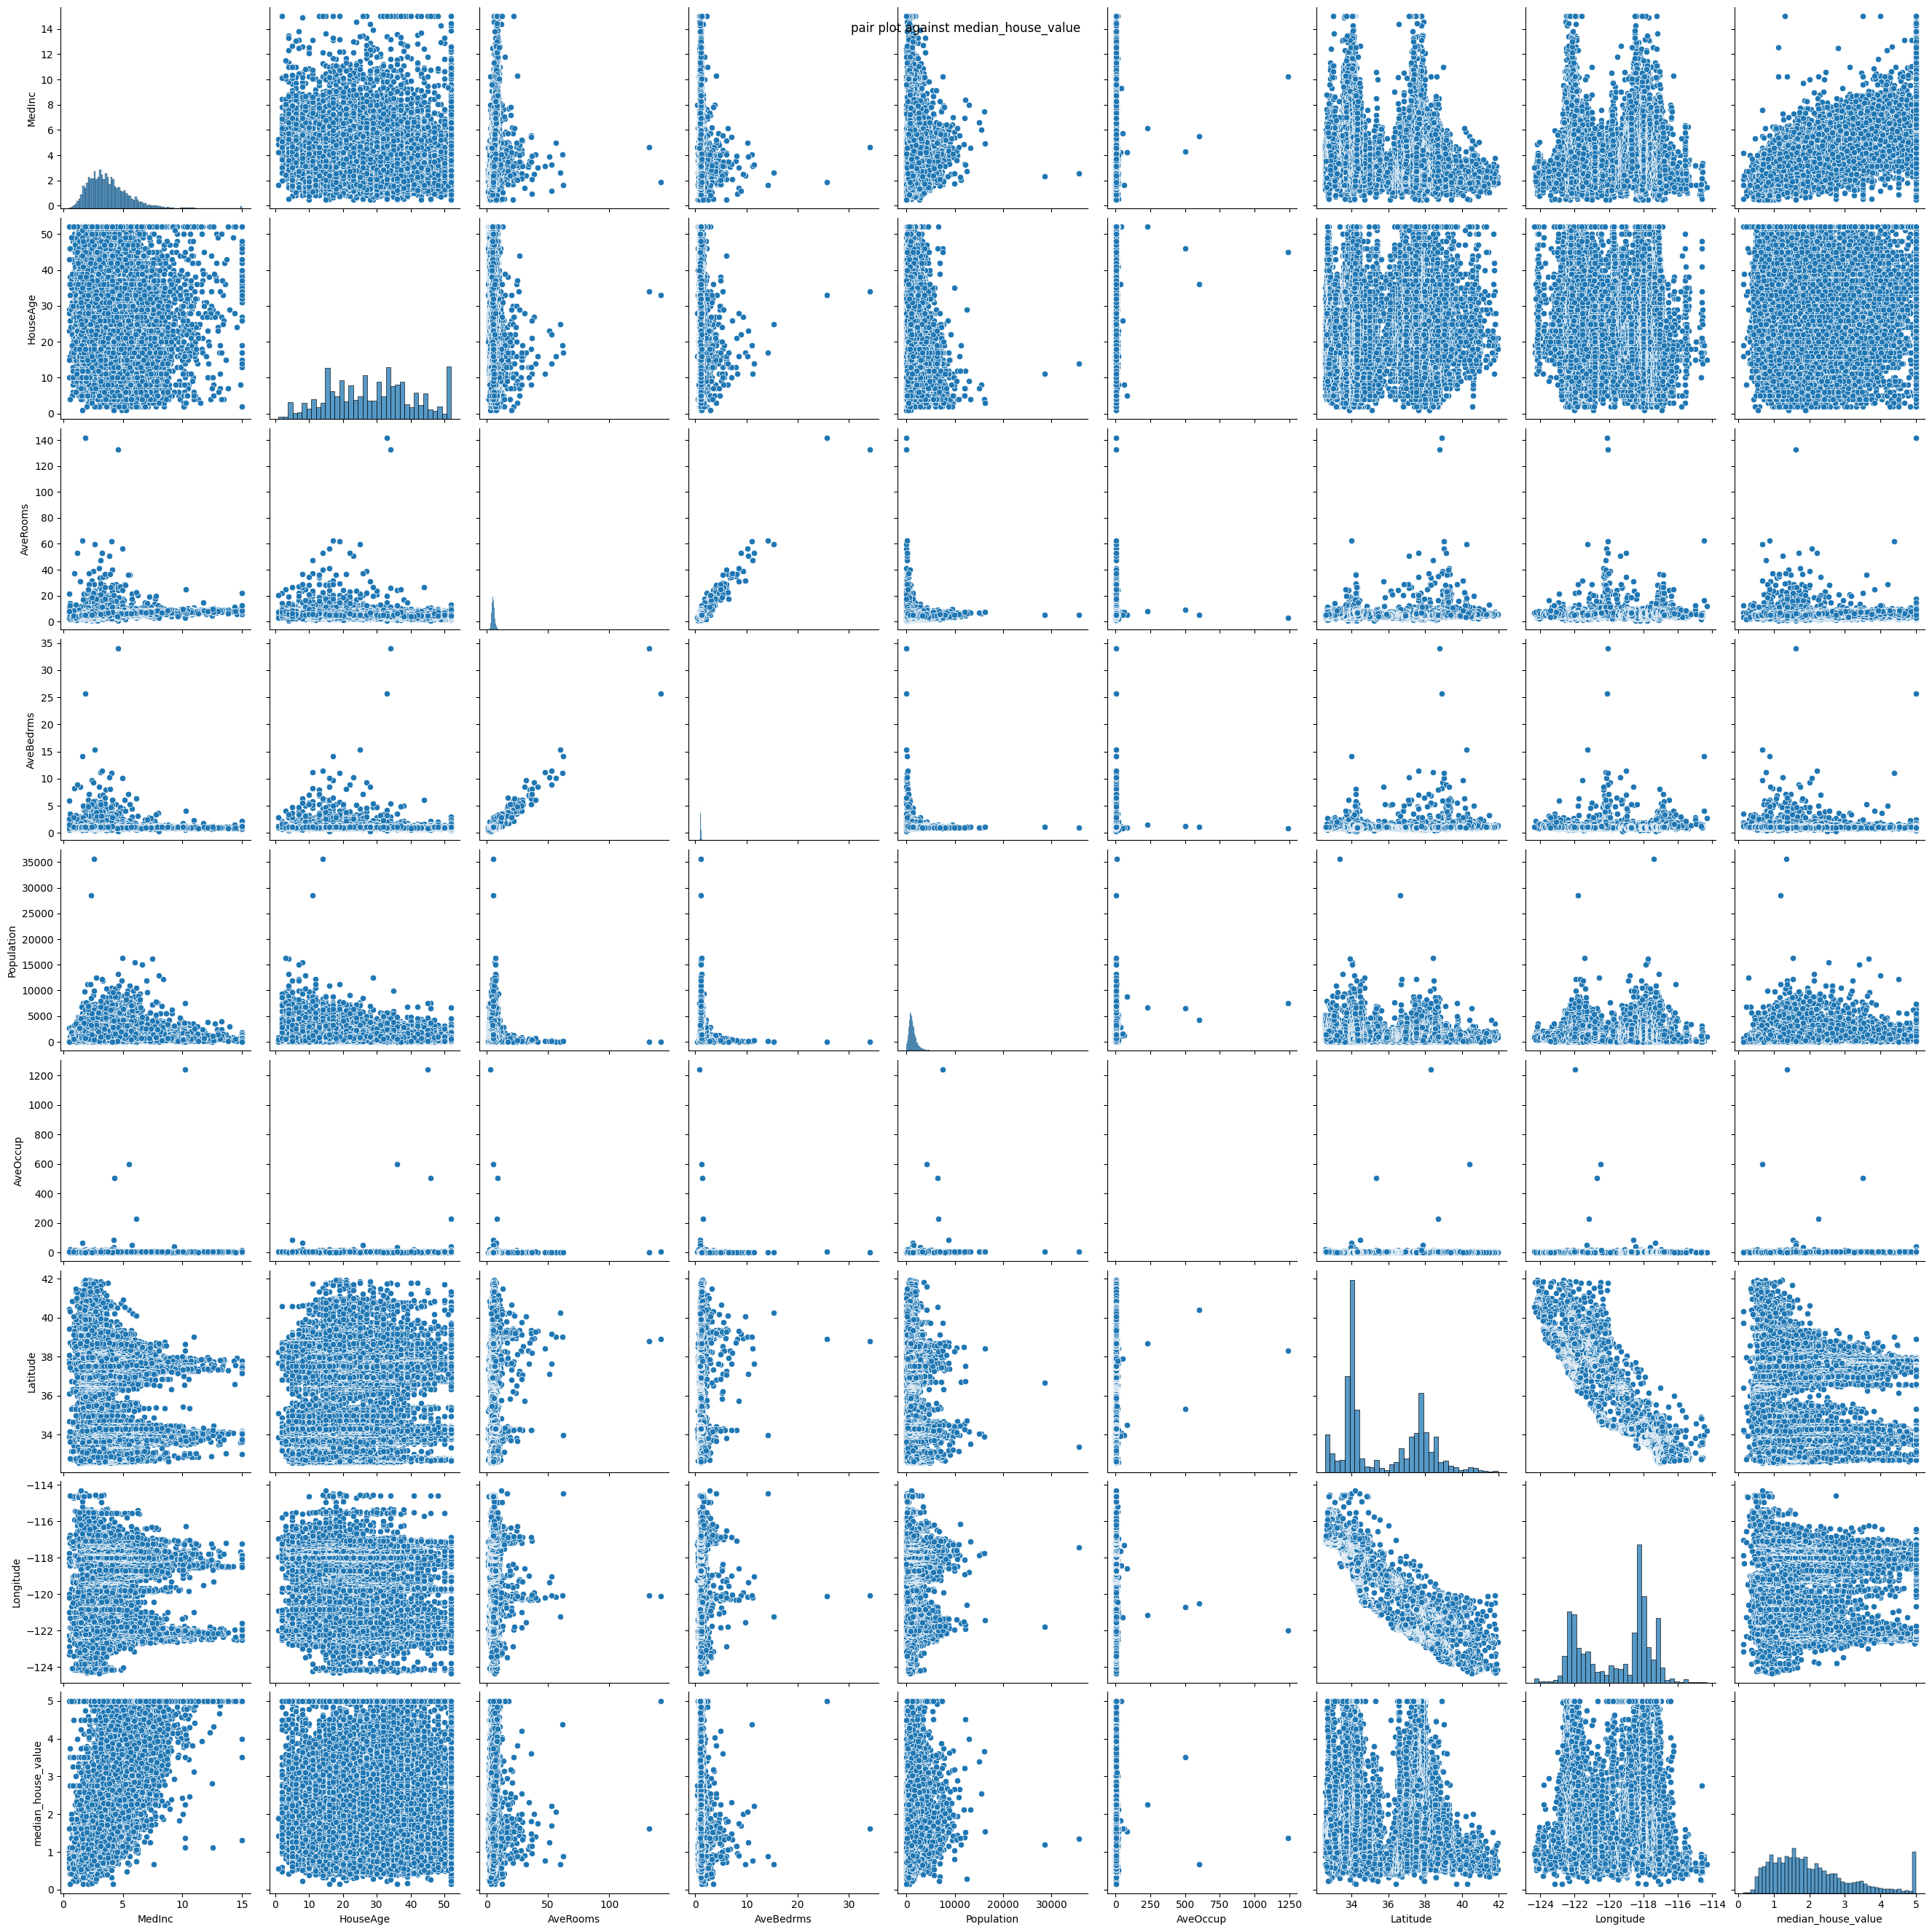

In [30]:
sns.pairplot(housing_df, height = 3)
plt.suptitle("pair plot against median_house_value")
plt.show()

# Geographical Distribution of data type based on longitude and latitude

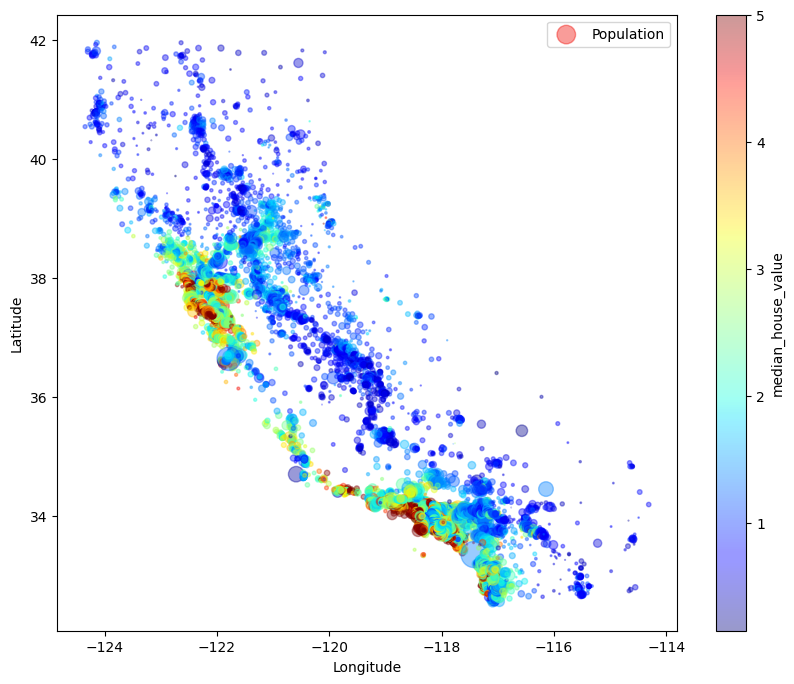

In [35]:
housing_df.plot(
    kind = "scatter",
    x = 'Longitude',
    y = 'Latitude',
    alpha = 0.4,
    s = housing_df['Population']/100,
    label = 'Population',
c = 'median_house_value',
cmap = 'jet',
colorbar = True,
figsize=(10,8)
)
plt.show()

# Checking The Multicollinerity

In [36]:
corr = housing_df.corr()

In [38]:
plt.figure(figsize = (10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

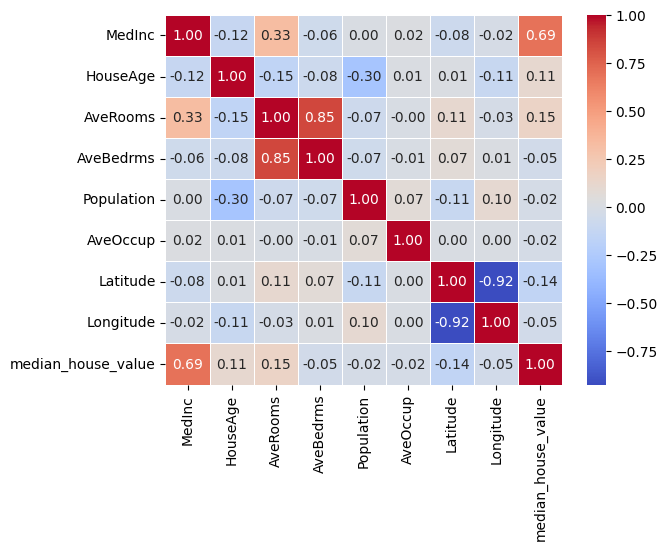

In [39]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm',fmt = '.2f',linewidth = 0.5)

# absolute correlation value

In [40]:
corr['median_house_value'].abs().sort_values(ascending = False)

median_house_value    1.000000
MedInc                0.688075
AveRooms              0.151948
Latitude              0.144160
HouseAge              0.105623
AveBedrms             0.046701
Longitude             0.045967
Population            0.024650
AveOccup              0.023737
Name: median_house_value, dtype: float64

# correlation  between MedInc and median_house_value

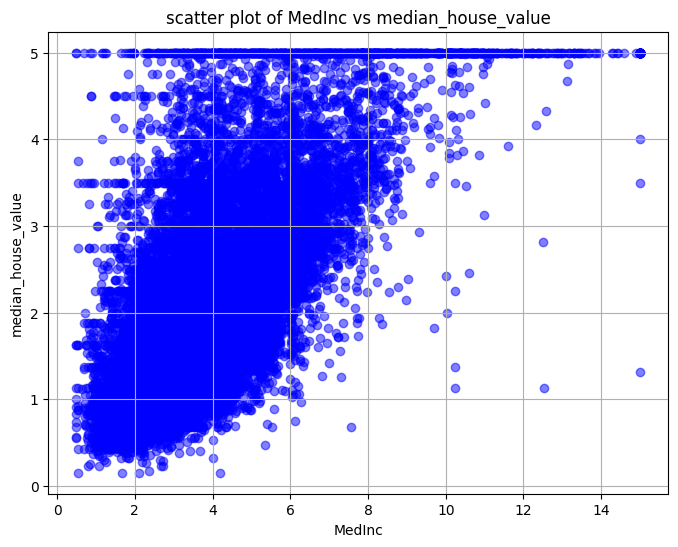

In [44]:
MedInc = housing_df['MedInc']
median_house_value = housing_df['median_house_value']
plt.figure(figsize = (8,6))
plt.scatter(MedInc,median_house_value, alpha = 0.5, color ='blue')
plt.title("scatter plot of MedInc vs median_house_value")
plt.xlabel('MedInc')
plt.ylabel('median_house_value')
plt.grid(True)
plt.show()

# calculate the VIF of each feature of housing datasets

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
housing_df_vif = housing_df.drop('median_house_value',axis = 1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric,errors = 'coerce')

In [48]:
vif_data = pd.DataFrame()
vif_data['Feature'] = housing_df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(housing_df_vif.values,i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
housing_df_vif = housing_df.drop('median_house_value', axis = 1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors = 'coerce')
vif_data = pd.DataFrame()
vif_data['Feature'] = housing_df_vif.columns
vif_data['VIF'] = [variance_inflation_factor(housing_df_vif.values,i) for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


# Removing the longitude and latitude from the dataset to reduce the multicollinearity

In [56]:
housing_df = housing_df.drop(['Latitude','Longitude'], axis = 1)

In [57]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


# converting the dataset into numeric

In [59]:
cols_to_convert = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric,errors = 'coerce')
housing_df['median_house_value'] = pd.to_numeric(housing_df['median_house_value'],errors = 'coerce')

x = sm.add_constant(housing_df.drop('median_house_value',axis = 1))
y = housing_df['median_house_value']
model = sm.OLS(y,x).fit()

# Residual and Coefficient in Linear Regression

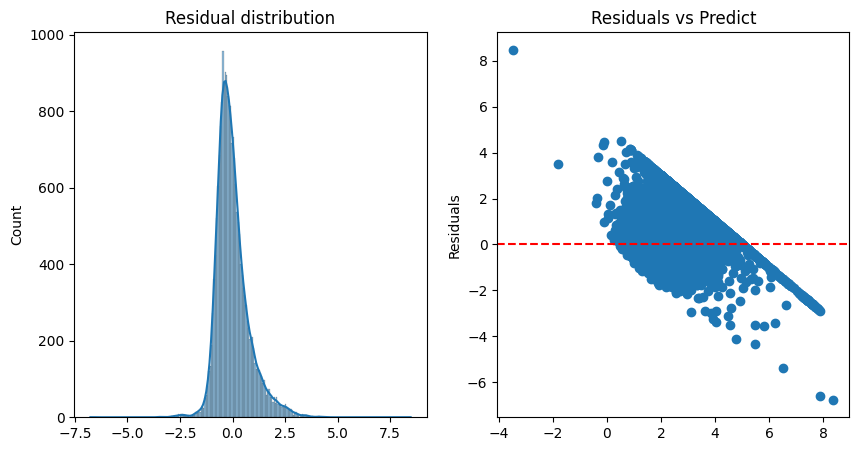

Model coefficient:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [63]:
residuals = model.resid
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde = True)
plt.title('Residual distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y = 0,color = 'red',linestyle = '--')
plt.title('Residuals vs Predict')
plt.ylabel('Residuals')
plt.show()

print("Model coefficient:\n", model.params)

# Evaluate a model on housing Datasets

In [64]:
# computing a mean square error and interpretibly square
from sklearn.metrics import mean_squared_error, r2_score
prediction = model.predict(x)

print("R square Score:", r2_score(y,prediction))
print("MSE:", mean_squared_error(y, prediction))

R square Score: 0.5396977345638282
MSE: 0.6129156196698704


# visualizing the distribution of datasets using boxplot

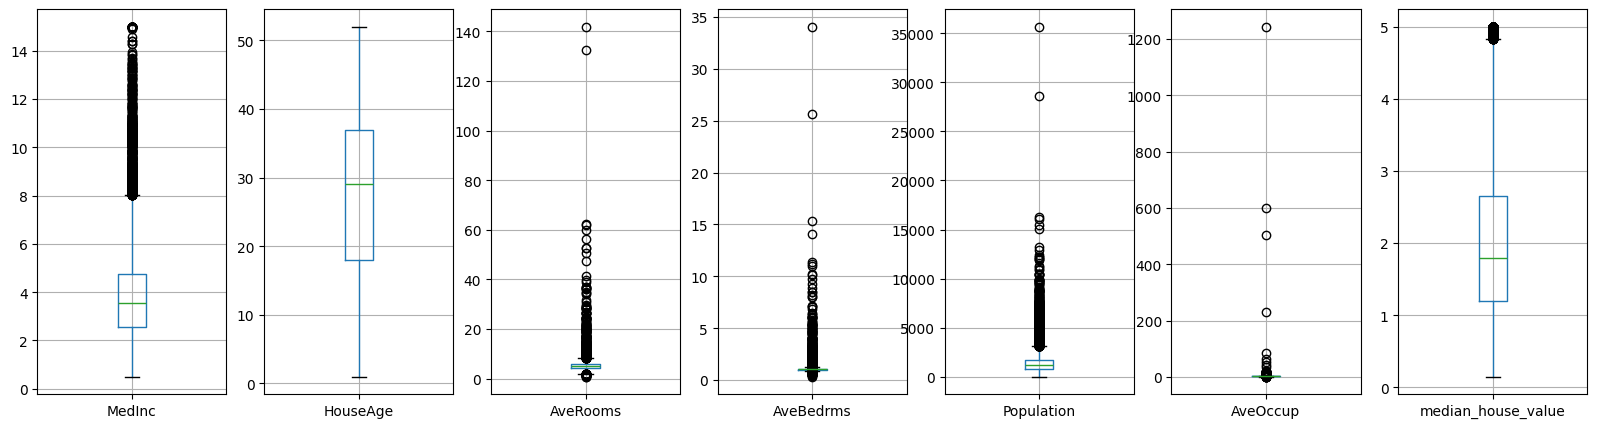

In [67]:
import matplotlib.pyplot as plt
def plot_boxplots(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize = (20,5))
    for i, column_name in enumerate(df.columns):
        df.boxplot(column = column_name,ax = axes[i])
    plt.show()

plot_boxplots(housing_df)

# Remove the outlier to increase the model accuracy

In [68]:
def remove_outliers(df):
    df_no_outliers = df.copy()

In [88]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)

In [89]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

In [102]:
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR
def df_no_outliers():
    {
    
      df_no_outliers[column_name] ==  df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound
                                                                else upper_bound if x > upper_bound else x)

}
housing_df_new = remove_outliers(housing_df)

In [103]:
print(housing_df_new)

None


In [114]:
def plot_boxplots(df):
    plt_boxplots(housing_df)

In [113]:
cols_to_convert = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric,errors ='coerce')
housing_df['median_house_value'] = pd.to_numeric(housing_df['median_house_value'],errors = 'coerce')
x = sm.add_constant(housing_df.drop('median_house_value',axis = 1))
y = housing_df['median_house_value']
model = sm.OLS(y,x).fit()

# again calculating the residual and coefficient in linear regression

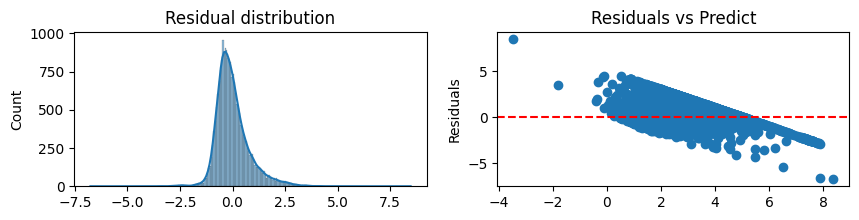

Model coefficient:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [117]:
residuals = model.resid
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
sns.histplot(residuals, kde = True)
plt.title('Residual distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y = 0,color = 'red',linestyle = '--')
plt.title('Residuals vs Predict')
plt.ylabel('Residuals')
plt.show()

print("Model coefficient:\n", model.params)

In [118]:
# computing a mean square error and interpretibly square
from sklearn.metrics import mean_squared_error, r2_score
prediction = model.predict(x)

print("R square Score:", r2_score(y,prediction))
print("MSE:", mean_squared_error(y, prediction))

R square Score: 0.5396977345638282
MSE: 0.6129156196698704
